## Read MNIST data

In [26]:
from sklearn import datasets, svm, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
import os
import struct
import numpy as np
import matplotlib.pyplot as pyplot


"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    return img, lbl
    


In [28]:
path = 'MNIST/'
X_train, y_train = read("testing", path)
X_test, y_test = read("training", path)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(60000, 784)
(60000,)


## Preprocessing with StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#print(np.sum(X_train_scaled[0]))

In [31]:
cv = KFold(n_splits=5, shuffle=False)

In [ ]:
"""
from sklearn import datasets, metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

classifier = svm.LinearSVC(C=1.0, loss='hinge', multi_class='ovr', random_state=108)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
intercept_scaling=1, loss='hinge', max_iter=1000,
multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

LinearSVC(C=c, loss='squred_hinge', multi_class='ovr', random_state=108)

y_pred = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)

"""

In [ ]:
"""
pipe = Pipeline([('scaler', scaler),('LinearSVC',classifier)])
parameter = {'LinearSVC_C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_pipe = GridSearchCV(pipe, parameter)
grid_pipe.fit(X,y)
print('Best hyperparameter: ', grid_pipe.best_params_)
print('Best score: ', grid_pipe.best_score_)
"""

## K-fold and training

In [34]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
#C  = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

C  = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
df = pd.DataFrame(columns=['C value', 'f1 score', 'learning time'])
bookmark = 0


for c in C:
    
    try:

        classifier = OneVsRestClassifier(svm.SVC(C=c, kernel='linear', random_state=108))
        #
        begin_time = datetime.now()

        #LinearSvc = classifier.fit(X_train_scaled, y_train)
        #K_foldCV_scores = cross_val_score(estimator=classifier,
                 #X=X_train_scaled,
                 #y=y_train,
                 #cv=cv,
                 #n_jobs=-1)
        end_time = datetime.now()
        #
        y_pred = classifier.fit(X_train_scaled, y_train).predict(X_test_scaled)
        score = f1_score(y_test, y_pred, average='macro')
        #
        df.loc[bookmark] = [c, score, end_time - begin_time]
        print(df.loc[bookmark])
        df.to_csv("LinearSVM2_ovr.csv", mode='w')

        bookmark = bookmark + 1                

    except Exception as ex:
        print('ERROR:', ex)
        break
    finally:
        print('=======================================')

df.to_csv("LR_multi2.csv", mode='w')

C value                           0.001
f1 score                       0.840205
learning time    0 days 00:00:41.847026
Name: 0, dtype: object
C value                            0.01
f1 score                        0.88046
learning time    0 days 00:01:14.259498
Name: 1, dtype: object
C value                             0.1
f1 score                       0.877044
learning time    0 days 00:01:33.498477
Name: 2, dtype: object
C value                               1
f1 score                        0.85627
learning time    0 days 00:01:59.220753
Name: 3, dtype: object
C value                              10
f1 score                       0.831804
learning time    0 days 00:03:18.366447
Name: 4, dtype: object
C value                             100
f1 score                       0.835014
learning time    0 days 00:02:22.324530
Name: 5, dtype: object
C value                            1000
f1 score                       0.835014
learning time    0 days 00:02:23.639903
Name: 6, dtype: object

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

model_ovr = OneVsRestClassifier(LinearSVC(c=1.0).fit(X_train_scaled, y_train)

ax1 = plt.subplot(211)
pd.DataFrame(model_ovr.decision_function(X_train_scaled)).plot(ax=ax1, legend=False)
plt.title("판별 함수")
ax2 = plt.subplot(212)
pd.DataFrame(model_ovr.predict(X_train_scaled), columns=["prediction"]).plot(marker='o', ls="", ax=ax2)
plt.title("클래스 판별")
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-33-ebcfcb545513>, line 5)

In [22]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report for classifier LinearSVC(C=1000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=108, tol=0.0001, verbose=0):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5923
           1       0.90      0.96      0.93      6742
           2       0.81      0.79      0.80      5958
           3       0.85      0.78      0.82      6131
           4       0.84      0.85      0.84      5842
           5       0.78      0.76      0.77      5421
           6       0.87      0.90      0.88      5918
           7       0.86      0.86      0.86      6265
           8       0.79      0.75      0.77      5851
           9       0.77      0.82      0.79      5949

    accuracy                           0.84     60000
   macro avg       0.84      0.84      0.84     60000
weighted avg       0.84      0.84      0.84 

## K-FOLD CV

In [ ]:
scores = cross_val_score(estimator=classifier,
                         X=X_train_scaled,
                         y=y_train,
                         cv=cv,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

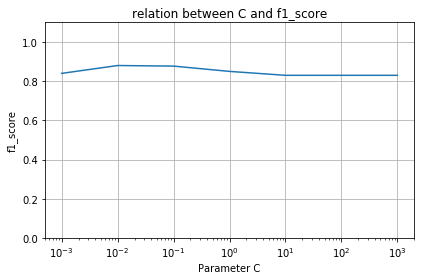

In [44]:
f1_score = [ 0.840, 0.88, 0.877,  0.85,  0.83, 0.83, 0.83]
c = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0 ,1000.0]
plt.title("relation between C and f1_score")
plt.plot(c, f1_score)
plt.grid()
plt.xscale('log')
plt.ylabel('f1_score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearSVC(random_state=108))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.854


In [ ]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()